In [2]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Single run

In [3]:
pickle_name = "./Results/Run7/Results_final_pickle.pkl"
# pickle_name = "./Results/Run23/Results29_pickle.pkl"

with open(pickle_name, 'rb') as handle:
    dict_data = pickle.load(handle)
df = pd.DataFrame.from_dict(dict_data)

In [4]:
df['ratio b1/n1'] = df['b1'] /df['n1'] 
df['ratio b2/n2'] = df['b2'] /df['n2'] 
df['ratio b3/n3'] = df['b3'] /df['n3'] 

df['Block size/Cache'] = df['b1']*df['b2']*df['b3']*4/11264000

df['cummax'] = df['Performance'].cummax()
# df.sort_values(['Performance'], ascending=[False],inplace=True)
df

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,ratio n1/b1,ratio n2/b2,ratio n3/b3,cummax
0,0,0,1338.91,init,480,288,992,avx512,-Ofast,16,432,11,175,1.111111,26.181818,5.668571,1338.91
1,0,1,1318.34,init,288,320,992,avx512,-O3,16,400,18,144,0.720000,17.777778,6.888889,1338.91
2,0,2,1315.33,init,704,640,928,avx,-O3,16,512,23,193,1.375000,27.826087,4.808290,1338.91
3,0,3,1314.92,init,256,576,736,avx,-O3,16,416,32,140,0.615385,18.000000,5.257143,1338.91
4,0,4,1311.26,init,640,320,992,avx,-Ofast,16,480,11,131,1.333333,29.090909,7.572519,1338.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,10,115,743.14,init,320,384,288,avx2,-O3,16,160,30,235,2.000000,12.800000,1.225532,1739.47
1315,10,116,707.52,init,1024,1024,576,avx,-O2,16,160,51,169,6.400000,20.078431,3.408284,1739.47
1316,10,117,705.41,init,1024,288,736,avx,-O2,16,160,31,173,6.400000,9.290323,4.254335,1739.47
1317,10,118,677.39,init,1024,960,960,avx2,-Ofast,16,128,63,196,8.000000,15.238095,4.897959,1739.47


In [5]:
def pop_std(x):
    return x.std(ddof=0)

df_stat = df[['Epoch', 'Performance','cummax']].groupby(['Epoch'], as_index=True).agg({'Performance':['mean',pop_std,'min','max'],'cummax':'last'}).reset_index()
df_stat.columns = ['Epoch','Avg Performance', 'Std','min','max','cummax']


In [32]:
# df_stat

Text(0, 0.5, 'Throughput [MPoints/s]')

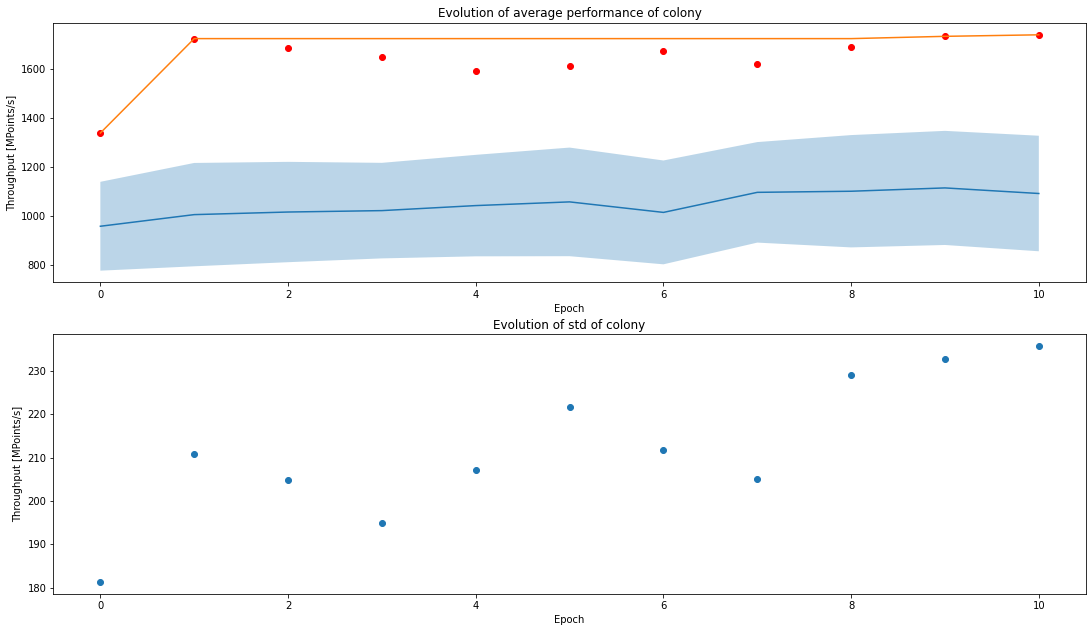

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)
ax1.plot(df_stat['Epoch'], df_stat['Avg Performance'])
ax1.plot(df_stat['Epoch'], df_stat['cummax'])
ax1.scatter(df_stat['Epoch'], df_stat['max'], color = 'r')

# ax1.plot(df_stat['Epoch'], df_stat['min'], color = 'r')

ax1.fill_between(df_stat['Epoch'], df_stat['Avg Performance']-1*df_stat['Std'], df_stat['Avg Performance']+1*df_stat['Std'] ,alpha=0.3)
ax1.title.set_text('Evolution of average performance of colony')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Throughput [MPoints/s]')
# ax1.legend(['Avg Performance with 1 std', 'Best solution','max'])


ax2.scatter(df_stat['Epoch'], df_stat['Std'])
ax2.title.set_text('Evolution of std of colony')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Throughput [MPoints/s]')




In [7]:
counter = 0
filename = "./Plots/Plot{}.png"

In [8]:
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = filename.format(counter)
fig.savefig(filename, dpi=100)


# Multiple files

In [9]:
pickle_name = "Results_final_pickle.pkl"

import os
rootdir = os.getcwd() + '/Results'
list_dict_data = []
list_runs = []
for subdir, dirs, files in os.walk(rootdir):
    if 'Run' in subdir:
        path = os.path.join(subdir, pickle_name)
        run = os.path.basename(subdir)
        if os.path.isfile(path):
            with open(path, 'rb') as handle:
                dict_data_mult = pickle.load(handle)
            list_dict_data.append(dict_data_mult)
            list_runs.append(run)
            
# convert dict to dataframes
dataframes = [pd.DataFrame(d) for d in list_dict_data]
df_mult = pd.concat([df.assign(Run=key) for key, df in zip(list_runs, dataframes)])
        

In [14]:
df_mult['ratio b1/n1'] = df_mult['b1'] /df_mult['n1'] 
df_mult['ratio b2/n2'] = df_mult['b2'] /df_mult['n2'] 
df_mult['ratio b3/n3'] = df_mult['b3'] /df_mult['n3'] 

df_mult['Block size/Cache'] = df_mult['b1']*df_mult['b2']*df_mult['b3']*4/11264000

df_mult['cummax'] = df_mult.groupby(['Run'])['Performance'].agg(['cummax'])
df_mult.sort_values(['Performance'], ascending=[False],inplace=True)
# df_mult.loc[df_mult['Run'] == 'Run39']


In [15]:
df_mult.head(20)

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,...,b3,Run,ratio n1/b1,ratio n2/b2,ratio n3/b3,cummax,Block size/Cache,ratio b1/n1,ratio b2/n2,ratio b3/n3
599,5,0.0,2057.32,init,288,992,896,avx512,-O2,16,...,158,Run0,0.750000,41.333333,5.670886,2057.32,0.517091,1.333333,0.024194,0.176339
479,4,0.0,1924.05,init,416,960,992,avx2,-Ofast,16,...,172,Run12,1.000000,68.571429,5.767442,1924.05,0.355727,1.000000,0.014583,0.173387
1199,10,0.0,1899.10,init,352,832,928,avx,-Ofast,16,...,238,Run8,0.916667,48.941176,3.899160,1899.10,0.551727,1.090909,0.020433,0.256466
1079,9,0.0,1887.77,init,320,864,1024,avx2,-O2,16,...,173,Run9,0.740741,37.565217,5.919075,1887.77,0.610415,1.350000,0.026620,0.168945
1199,10,0.0,1886.73,init,416,928,1024,avx512,-O3,16,...,197,Run14,0.838710,54.588235,5.197970,1886.73,0.589881,1.192308,0.018319,0.192383
1079,9,0.0,1875.48,init,320,832,992,avx,-Ofast,16,...,256,Run12,0.769231,43.789474,3.875000,1924.05,0.718545,1.300000,0.022837,0.258065
959,8,0.0,1864.89,init,288,928,736,avx2,-O2,16,...,137,Run4,0.562500,61.866667,5.372263,1864.89,0.373636,1.777778,0.016164,0.186141
719,6,0.0,1857.64,init,384,992,768,avx,-Ofast,16,...,209,Run0,0.857143,35.428571,3.674641,2057.32,0.931000,1.166667,0.028226,0.272135
1079,9,0.0,1841.53,init,352,416,960,avx2,-O3,16,...,136,Run1,0.785714,32.000000,7.058824,1841.53,0.281273,1.272727,0.031250,0.141667
839,7,0.0,1838.86,init,352,864,992,avx512,-O2,16,...,134,Run12,0.758621,43.200000,7.402985,1924.05,0.441591,1.318182,0.023148,0.135081


Text(0, 0.5, 'Throughput [MPoints/s]')

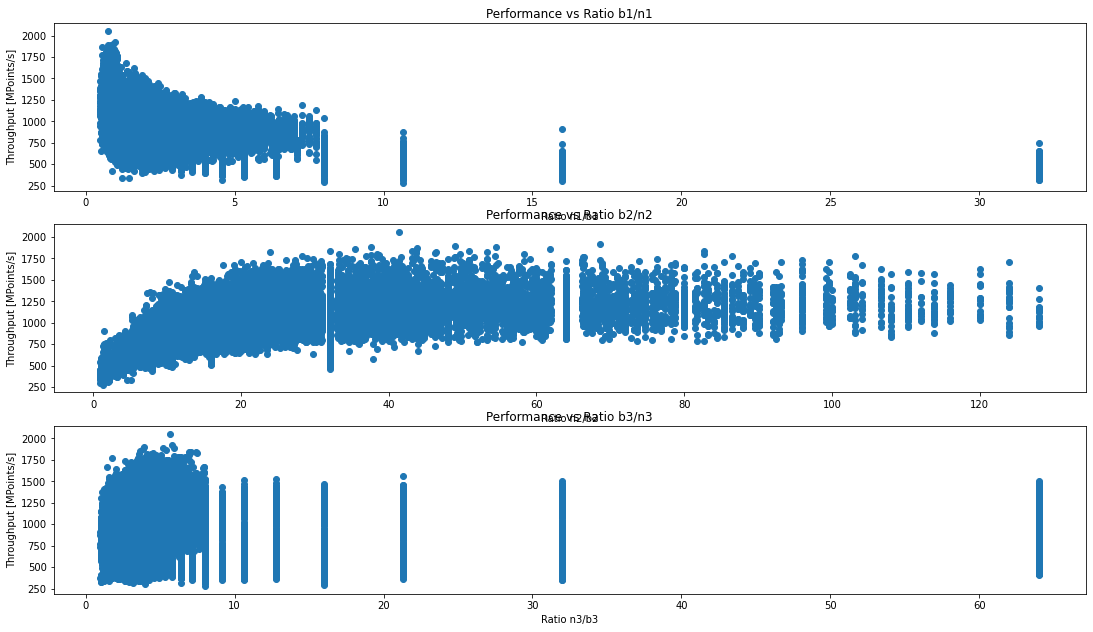

In [19]:
fig2, (ax1, ax2,ax3) = plt.subplots(3, 1)
fig2.set_size_inches(18.5, 10.5)
ax1.scatter(df_mult['ratio n1/b1'], df_mult['Performance'])

ax1.title.set_text('Performance vs Ratio b1/n1')
ax1.set_xlabel('Ratio n1/b1')
ax1.set_ylabel('Throughput [MPoints/s]')
# ax1.legend(['Avg Performance with 1 std', 'Best solution','max'])


ax2.scatter(df_mult['ratio n2/b2'], df_mult['Performance'])
ax2.title.set_text('Performance vs Ratio b2/n2')
ax2.set_xlabel('Ratio n2/b2')
ax2.set_ylabel('Throughput [MPoints/s]')


ax3.scatter(df_mult['ratio n3/b3'], df_mult['Performance'])
ax3.title.set_text('Performance vs Ratio b3/n3')
ax3.set_xlabel('Ratio n3/b3')
ax3.set_ylabel('Throughput [MPoints/s]')






Text(0, 0.5, 'Throughput [MPoints/s]')

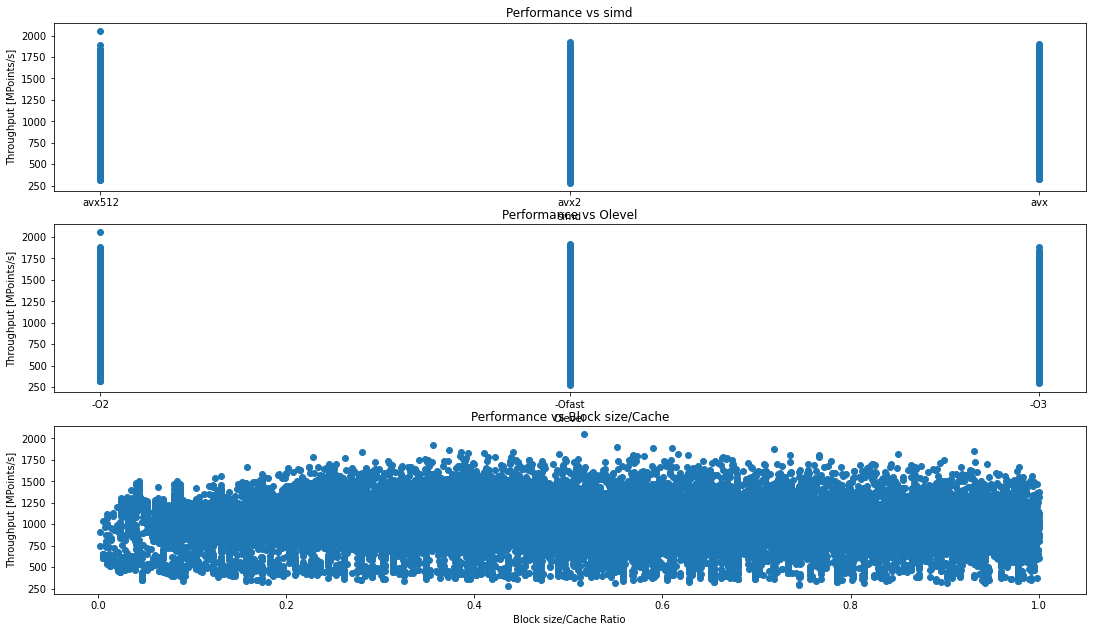

In [20]:
fig3, (ax1, ax2,ax3) = plt.subplots(3, 1)
fig3.set_size_inches(18.5, 10.5)
ax1.scatter(df_mult['simd'], df_mult['Performance'])

ax1.title.set_text('Performance vs simd')
ax1.set_xlabel('simd')
ax1.set_ylabel('Throughput [MPoints/s]')
# ax1.legend(['Avg Performance with 1 std', 'Best solution','max'])


ax2.scatter(df_mult['Olevel'], df_mult['Performance'])
ax2.title.set_text('Performance vs Olevel')
ax2.set_xlabel('Olevel')
ax2.set_ylabel('Throughput [MPoints/s]')


ax3.scatter(df_mult['Block size/Cache'], df_mult['Performance'])
ax3.title.set_text('Performance vs Block size/Cache')
ax3.set_xlabel('Block size/Cache Ratio')
ax3.set_ylabel('Throughput [MPoints/s]')

